# predict credit card approval



# section 1 question answer

Q1. Why is your proposal important in today’s world? How predicting a good client is worthy for a bank?  


To address the rising credit card defaults amounting to Rs 4,072 crore or 1.94 percent at the end of March 2023, as reported by the RBI, it is crucial to implement a credit evaluation system capable of identifying creditworthy customers. By minimizing default amounts, the recovered funds can be redirected towards other developmental and social needs.
In banking terms, credit cards and loans are considered assets of the bank. However, due to the misfinancial behavior of some customers, these assets can transform into non-performing assets. By accurately predicting creditworthiness, we can provide financial strength to the bank, mitigating the impact of non-performing assets.









Q2.How is it going to impact the banking sector? 
In banking terms, credit cards and loans are considered assets of the bank. However, due to the misfinancial behavior of some customers, these assets can transform into non-performing assets. By using this Creditcard approval model we can able predict creditworthiness, we can provide financial strength to the bank, mitigating the impact of non-performing assets.

 



Q3. If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any bank in India.
As we discuss in previous question that credit card defaults is 1.94% in March 2023. This prediction is helpful in mitigate this
problem . The method has the potential to adapt to changing trends and improve customer satisfaction through a more personalized approach.Apart from that we need to engage with local authority to implement with kind of model on large scale.




In [2]:
# importing required dependencencies 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 


## Reading the csv file and merging .

In [3]:
df = pd.read_csv('Credit_card.csv')
df1 = pd.read_csv('Credit_card_label.csv')
df.head()
# merging two dataframe
df2 = df.merge(df1)
df2

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0


# Process of the data cleaning

In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [5]:
# REMOVEING UNNECESSARY COLUMN FROM DATASET
columns_to_remove = ['Phone', 'Work_Phone', 'EMAIL_ID','Mobile_phone']

# Use the drop method to remove the specified columns
df2.drop(columns=columns_to_remove, inplace=True)


In [6]:


df2.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Type_Occupation  1060 non-null   object 
 13  Family_Members   1548 non-null   int64  
 14  label            1548 non-null   int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 181.5+ KB


## filling the missing value

In [7]:
d1 = df2['GENDER'].mode()
# filling null value of gender by it's mode
df2['GENDER'].fillna('F', inplace=True)
df2['Annual_income'].fillna(df2['Annual_income'].median(),inplace=True)
df2['Type_Occupation'].fillna('Unknown',inplace=True)
df2['Birthday_count'].fillna(df2['Birthday_count'].median(),inplace=True)
df2['Age'] = df2['Birthday_count']*(-1) // 365
df2.head()



,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Type_Occupation,Family_Members,label,Age
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,Unknown,2,1,51.0
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,Unknown,2,1,37.0
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-15661.5,-586,Unknown,2,1,42.0
3,5009749,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,Unknown,2,1,37.0
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,Unknown,2,1,37.0


In [8]:
columns_to_drop = ['Birthday_count']
df2 = df2.drop(columns=columns_to_drop, axis=1)


In [9]:
df2.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Employed_days,Type_Occupation,Family_Members,label,Age
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,365243,Unknown,2,1,51.0
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-586,Unknown,2,1,37.0
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-586,Unknown,2,1,42.0
3,5009749,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,-586,Unknown,2,1,37.0
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-586,Unknown,2,1,37.0


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1548 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1548 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Employed_days    1548 non-null   int64  
 11  Type_Occupation  1548 non-null   object 
 12  Family_Members   1548 non-null   int64  
 13  label            1548 non-null   int64  
 14  Age              1548 non-null   float64
dtypes: float64(2), int64(5), object(8)
memory usage: 181.5+ KB


In [11]:


# Assuming your DataFrame is named df
# Create a new column 'Employed_years' by dividing 'Employed days' by 365 (assuming each year has 365 days)
df2['Employed_years'] = df2['Employed_days'] / 365

# Replace the original column with a numerical version
df2['Employed_days'] = df2['Employed_years']

# Replace negative values with 0
df2['Employed_days'] = df2['Employed_days'].apply(lambda x: x if x <= 0 else 0 )
df2['Employed_days']= df2['Employed_days'] / 10







In [12]:
# Drop the intermediate 'Employed_years' column if you don't need it
df2 = df2.drop('Employed_years', axis=1)

# Display the DataFrame
print(df2.head())


    Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0       166500.0   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Employed_days Type_Occupation  Family_Members  label   Age  
0       0.000000         Unknown        

In [13]:
# saving the dataframe
d1 = df2.to_csv('file1.csv')
d1

In [14]:
df2 = df2.drop('Ind_ID',axis=1)

In [15]:
df2.info()
df2['Type_Occupation'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GENDER           1548 non-null   object 
 1   Car_Owner        1548 non-null   object 
 2   Propert_Owner    1548 non-null   object 
 3   CHILDREN         1548 non-null   int64  
 4   Annual_income    1548 non-null   float64
 5   Type_Income      1548 non-null   object 
 6   EDUCATION        1548 non-null   object 
 7   Marital_status   1548 non-null   object 
 8   Housing_type     1548 non-null   object 
 9   Employed_days    1548 non-null   float64
 10  Type_Occupation  1548 non-null   object 
 11  Family_Members   1548 non-null   int64  
 12  label            1548 non-null   int64  
 13  Age              1548 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 169.4+ KB


array(['Unknown', 'Core staff', 'Cooking staff', 'Laborers',
       'Sales staff', 'Accountants', 'High skill tech staff', 'Managers',
       'Cleaning staff', 'Drivers', 'Low-skill Laborers', 'IT staff',
       'Waiters/barmen staff', 'Security staff', 'Medicine staff',
       'Private service staff', 'HR staff', 'Secretaries',
       'Realty agents'], dtype=object)

In [16]:
#Create a list of column names with 'label' at the end
new_column_order = [col for col in df2.columns if col != 'label'] + ['label']

# Reorder the columns in the DataFrame
df2 = df2[new_column_order]

# Display the DataFrame
print(df2)

     GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0         M         Y             Y         0       180000.0   
1         F         Y             N         0       315000.0   
2         F         Y             N         0       315000.0   
3         F         Y             N         0       166500.0   
4         F         Y             N         0       315000.0   
...     ...       ...           ...       ...            ...   
1543      F         N             Y         0       166500.0   
1544      F         N             N         0       225000.0   
1545      M         Y             Y         2       180000.0   
1546      M         Y             N         0       270000.0   
1547      F         Y             Y         0       225000.0   

               Type_Income                      EDUCATION  \
0                Pensioner               Higher education   
1     Commercial associate               Higher education   
2     Commercial associate               Higher 

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GENDER           1548 non-null   object 
 1   Car_Owner        1548 non-null   object 
 2   Propert_Owner    1548 non-null   object 
 3   CHILDREN         1548 non-null   int64  
 4   Annual_income    1548 non-null   float64
 5   Type_Income      1548 non-null   object 
 6   EDUCATION        1548 non-null   object 
 7   Marital_status   1548 non-null   object 
 8   Housing_type     1548 non-null   object 
 9   Employed_days    1548 non-null   float64
 10  Type_Occupation  1548 non-null   object 
 11  Family_Members   1548 non-null   int64  
 12  Age              1548 non-null   float64
 13  label            1548 non-null   int64  
dtypes: float64(3), int64(3), object(8)
memory usage: 169.4+ KB


In [18]:
# split my dataset in dependent and independent feature 
X = df2.iloc[:,:-1]
Y = df2.iloc[:,-1]


In [19]:
X

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Employed_days,Type_Occupation,Family_Members,Age
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,0.000000,Unknown,2,51.0
1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-0.160548,Unknown,2,37.0
2,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-0.160548,Unknown,2,42.0
3,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,-0.160548,Unknown,2,37.0
4,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-0.160548,Unknown,2,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,F,N,Y,0,166500.0,Commercial associate,Higher education,Married,House / apartment,-0.597808,Managers,2,32.0
1544,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-0.331233,Accountants,1,28.0
1545,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-0.678630,Managers,4,36.0
1546,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-0.176712,Drivers,2,41.0


In [20]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
1543    0
1544    0
1545    0
1546    0
1547    0
Name: label, Length: 1548, dtype: int64

In [21]:
X_encoded = pd.get_dummies(X, columns=['Type_Occupation',  'Marital_status', 'Housing_type','Type_Income'])

# Mapping binary variables
X_encoded['GENDER'] = X_encoded['GENDER'].map({'M': 1, 'F': 0})
X_encoded['Car_Owner'] = X_encoded['Car_Owner'].map({'Y': 1, 'N': 0})
X_encoded['Propert_Owner'] = X_encoded['Propert_Owner'].map({'Y': 1, 'N': 0})
X_encoded['EDUCATION'] = X_encoded['EDUCATION'].map({'Higher education':4, 'Secondary / secondary special':2,
       'Lower secondary':1, 'Incomplete higher':3, 'Academic degree':5})

                                   

# Display the resulting DataFrame
print(X_encoded.head())

   GENDER  Car_Owner  Propert_Owner  CHILDREN  Annual_income  EDUCATION  \
0       1          1              1         0       180000.0          4   
1       0          1              0         0       315000.0          4   
2       0          1              0         0       315000.0          4   
3       0          1              0         0       166500.0          4   
4       0          1              0         0       315000.0          4   

   Employed_days  Family_Members   Age  Type_Occupation_Accountants  ...  \
0       0.000000               2  51.0                        False  ...   
1      -0.160548               2  37.0                        False  ...   
2      -0.160548               2  42.0                        False  ...   
3      -0.160548               2  37.0                        False  ...   
4      -0.160548               2  37.0                        False  ...   

   Housing_type_Co-op apartment  Housing_type_House / apartment  \
0                        

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded,Y , 
                                   random_state=0,  
                                   test_size=0.25,  
                                   shuffle=True)


In [23]:
# scaling the data 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


  

In [24]:
# Applying logistic regression model
classifier = LogisticRegression()

In [25]:
from sklearn.model_selection import GridSearchCV
parameters = {'penalty':['l2'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300]
             }


In [26]:
classifier_regressor = GridSearchCV(classifier,param_grid=parameters,scoring='accuracy',cv=5)

In [27]:
classifier_regressor.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300], 'penalty': ['l2']},
             scoring='accuracy')

In [28]:
print(classifier_regressor.best_score_)

0.8785481722657984


In [29]:
## predicition 

y_pred = classifier_regressor.predict(X_test_scaled) 


In [30]:
# accuracy score 
from sklearn.metrics import accuracy_score,classification_report 
score_logistic_model = accuracy_score(y_pred,y_test)
score_logistic_model_percentage = score_logistic_model*100
print(f"{score_logistic_model_percentage}%")

89.92248062015504%


In [31]:
# making confusion metrics 
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test,y_pred)
cm

array([[345,   1],
       [ 38,   3]], dtype=int64)

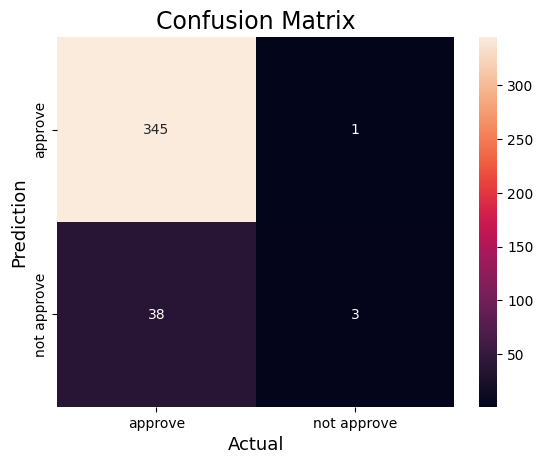

In [32]:
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['approve', 'not approve'],
            yticklabels=['approve', 'not approve'])  
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()



# calculating percentage of the type two error
Type 2 error is crucial in machine learning because it 
represents missed opportunities, can have serious consequences, impacts model sensitivity, involves a trade-off 
with Type 1 error, influences evaluation metrics, requires cost considerations, has context-specific significance, and necessitates continuous monitoring for improvement.







In [33]:
# values of falsenegitive and true positive according to classification model 
fn = 38 
tp = 345 



type_2_error =  fn / (fn + tp) if (fn + tp) != 0 else 0

type_2_error_percentage = type_2_error * 100

print("Type 2 error:", type_2_error_percentage, "%")




Type 2 error: 9.921671018276761 %


Type 2 error in logistic regression model is 8.73%

In [34]:
X_encoded.corrwith(Y).sort_values()

Housing_type_House / apartment          -0.065639
Marital_status_Civil marriage           -0.061278
Type_Income_State servant               -0.055120
Type_Income_Working                     -0.053938
Type_Occupation_Private service staff   -0.037620
Housing_type_With parents               -0.037266
Family_Members                          -0.030709
Type_Occupation_Medicine staff          -0.030607
Type_Occupation_Sales staff             -0.028711
Type_Occupation_Secretaries             -0.027301
CHILDREN                                -0.021646
Marital_status_Married                  -0.020029
Propert_Owner                           -0.017906
Type_Occupation_HR staff                -0.015732
Car_Owner                               -0.014734
Type_Occupation_Realty agents           -0.012841
Type_Occupation_Laborers                -0.012386
Type_Occupation_Managers                -0.009907
Type_Occupation_Cleaning staff          -0.008395
Type_Occupation_Drivers                 -0.006432


# prediction  using decision tree

In [ ]:
#Create a Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = decision_tree_model.predict(X_test)



In [ ]:
accuracy_decision_tree = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_decision_tree * 100:.2f}%")

In [ ]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test,y_pred)
cm

In [ ]:
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['approve', 'not approve'],
            yticklabels=['approve', 'not approve'])  
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

In [ ]:
fn = 28
tp = 266



type_2_error =  fn / (fn + tp) if (fn + tp) != 0 else 0

type_2_error_percentage = type_2_error * 100

print("Type 2 error:", type_2_error_percentage, "%")




# section 2 inital hypothesis 


Null hypothesis(H0) = logistic regression model is better then decision tree to predict this model 
accuracy_score of logistic regression model = 91.21%
accuracy_score of decision tree model = 71.83% 
# accuracy score of the  score of the both model is almost same 
# now let's check type2 error 
Type 2 error in logistic regression model is 8.75%
Type 2 error in decision tree model is 9.27%
#here we can is that type2 error in decision treee algorithm is higher then type2 error in logistic regression algorithem 
# so we can in infer that Null Hypothesis(H0) is true




   ## using random forest classifier model

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
Random_forest_model = RandomForestClassifier()

In [ ]:
# Train the model
Random_forest_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = Random_forest_model.predict(X_test)


In [ ]:
accuracy_Random_forest = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_Random_forest * 100:.2f}%")

In [ ]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test,y_pred)
cm

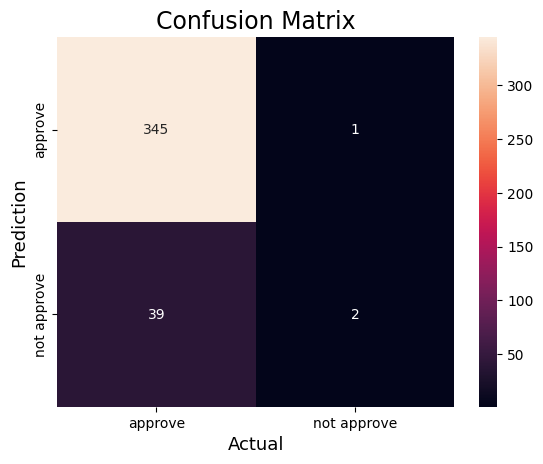

In [53]:
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['approve', 'not approve'],
            yticklabels=['approve', 'not approve'])  
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

In [54]:
fn = 39
tp = 345



type_2_error =  fn / (fn + tp) if (fn + tp) != 0 else 0

type_2_error_percentage = type_2_error * 100

print("Type 2 error:", type_2_error_percentage, "%")



Type 2 error: 10.15625 %


## Analysis using KNN

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded,Y , 
                                   random_state=0,  
                                   test_size=0.25,  
                                   shuffle=True)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [ ]:
 # Create and fit KNN classifier
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test_scaled)

# Evaluate the accuracy of the model
accuracy_knn = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

section 2 : Intial Hypothesis 

NullHypothesis(H0): Accuracy_score of Random_forest is higher than decision tree

In [ ]:
decision_tree_accuracy_percentage = accuracy_decision_tree* 100
random_forest_accuracy_percentage = accuracy_Random_forest * 100

col = ['accuracyofdecision_tree', 'accuracyofRandom_forest']
accuracy_scores = [decision_tree_accuracy_percentage, random_forest_accuracy_percentage]




# Plotting the bar graph
plt.bar(col,accuracy_scores, color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy Score (%)')
plt.title('Comparison of Decision Tree and Random Forest Accuracy')
plt.ylim(0, 100)  # Set y-axis range between 0 and 100
plt.show()

As we can see in this graph accuracy score of Random forest is greater than decision tree . so, our Null hypothesis is accepted.

##  analysis of features and target variable

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='EDUCATION', hue='label', data=df2, palette='pastel', order=df2['EDUCATION'].value_counts().index)
plt.title('Relationship between Education and Credit Card Approval')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.legend(title='Credit Card Approval', labels=[' Approved', 'Not Approved'])
plt.show()


Based on the graph, it's clear that individuals with Secondary/secondary special education show the highest number of both approvals and rejections. Next in line are those with Higher education, experiencing the second-highest count of both approvals and rejections. Subsequently, individuals with Incomplete higher, Lower secondary, and Academic degree backgrounds follow in descending order regarding the number of approvals and rejections.







In [ ]:
## getting statitcal measure for the annual_income col
summary_stats = df['Annual_income'].describe()

# Convert to a more conventional style
formatted_stats = summary_stats.apply(lambda x: f'{x:,.3f}' if x >= 1000 else f'{x:,.0f}')

# Display the formatted statistics
print(formatted_stats)

In [ ]:
df2['label'].value_counts().sum

here we can see that  approvement of credit card 1373 and not approvement of credit card 175

# section 3 : data analysis approach

Q1 . What approach are you going to take in order to prove or disprove your hypothesis? 
here my initial hypothesis :Accuracy_score of Random_forest is higher than decision tree  
for this first of all I find accuracy score of both of these model then as you can see I plot bar graph of accuracy_score 
of both this model . As we can see from graph that the accuracy score of the Random_forest is greater than the accuracy score of the decision tree 

Q2.What feature engineering techniques will be relevant to your project?
1. first of all we have to remove the null values from the to deal with it 
for that I used fillna() method  for numrical data I filled null value with the median of the column. 
for categorical data I used the mode of the column to replace the null value
2. remove the unwanted column 
To get more accurate result of the model we have to remove unwanted columns . In This project I found that 'Phone', 'Work_Phone', 'EMAIL_ID','Mobile_phone', 'Ind_ID' is unwanted column so I removed these columns
3. Modify the columns if need to get accurate result
In our project I replace the 'Birthday_count' column with 'Age'  using Age = Birthday_count // 365 so we are able to predict 
more accurate value



Q3. Please justify your data analysis approach. l 
For data analysis, I began by performing data cleaning, utilizing methods such as fillna(), median, and mode to handle missing values. Subsequently, I developed logistic regression and decision tree models for analysis and prediction. Additionally, I created a bar graph to visualize the relationship between education and the target variable, drawing inferences based on the plotted data.










Q4. Identify important patterns in your data using the EDA approach to justify your findings.
"I used the .corrwith method to assess the relationship between the target variable and features. Additionally, I created a bar graph depicting the relationship between the target variable (label) and education level. I constructed confusion matrices for different models to evaluate accuracy and identify errors." Considering the accuracy score and taking into account Type 2 errors, I determined that logistic regression is the most relevant model for this credit card approval project.












## section 4 machine learning approach

Q1. What method will you use for machine learning based predictions for credit card approval?
Here I used logistic regression , decision tree , random forest to perform predicitions.
 

Q2. Please justify the most appropriate model.
as we evaluated the model here are some findings 
accuracy_score of logistic regression = 89.92% 
accuracy_score of decision tree = 72.09%
accuracy_score of random_forest = 89.41%
type2 error in logistic regression = 9.9% 
type2 error in decision_tree = 9.52%
type2 error in random_forest = 10.52% 
accorrding to this data we can infer that logistic regression is most appropriate model.



Q3. Please perform necessary steps required to improve the accuracy of your model.
In this project in logistic regression I use GridSearchCV done some hyper parameter tuning   to improve the accuracy of the model.   



Q4.Please compare all models (at least 4  models).
In this project I used 4 model 1. logistic regression 2.Decision tree 3. Random forest 4. KNN  
Let's comapre this with accuracy score .



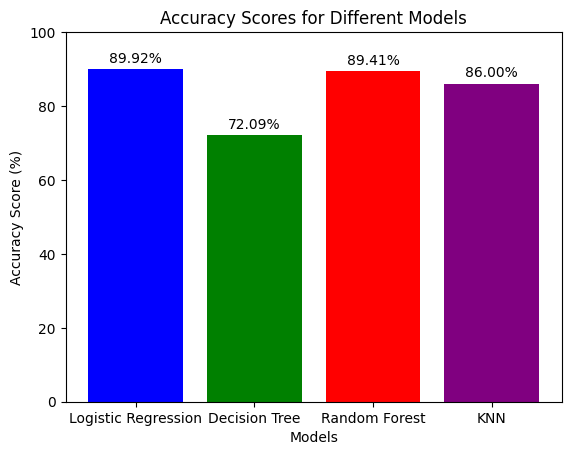

In [35]:
accuracy_score_logisticRegression = 89.92
accuracy_score_decision_tree = 72.09
accuracy_score_Random_forest = 89.41
accuracy_score_knn = 86
accuracy_scores = [89.92, 72.09, 89.41, 86]

# Models
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN']

# Create a bar chart
plt.bar(models, accuracy_scores, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Models')
plt.ylabel('Accuracy Score (%)')
plt.title('Accuracy Scores for Different Models')
plt.ylim(0, 100)

# Display the accuracy scores on top of the bars
for i, score in enumerate(accuracy_scores):
    plt.text(i, score + 1, f'{score:.2f}%', ha='center', va='bottom')

# Show the plot
plt.show()

Here you can see that the accuracy score of the Logistic regression model highst among the all the model . Decision Tree has lowest accuracy number among all the model 

# SQL Queries  

In [36]:
df_database = pd.read_csv('file1.csv')
df_database = df_database.drop(columns='Unnamed: 0')
import duckdb
conn=duckdb.connect()
conn.register('df',df_database)
conn.execute("select * from df where label='0'").fetchdf().head(5)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Employed_days,Type_Occupation,Family_Members,label,Age
0,5118538,F,N,Y,1,81000.0,Working,Secondary / secondary special,Married,Municipal apartment,-1.744384,Cleaning staff,3,0,43.0
1,5069057,M,Y,N,0,225000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-0.680548,Laborers,2,0,48.0
2,5066689,F,N,Y,0,180000.0,Commercial associate,Higher education,Civil marriage,House / apartment,-0.093425,Sales staff,2,0,35.0
3,5086062,F,N,Y,0,135000.0,State servant,Secondary / secondary special,Married,House / apartment,-2.581370,Core staff,2,0,56.0
4,5113717,F,N,N,1,135000.0,Working,Secondary / secondary special,Married,House / apartment,-0.836712,Private service staff,3,0,44.0


1.Group the customers based on their income type and find the average of their annual income.



In [37]:
conn.execute("select avg(Annual_income) as Average_of_annual_income,Type_income from df group by Type_Income ").fetchdf()

,Average_of_annual_income,Type_Income
0,155343.496283,Pensioner
1,180848.210526,Working
2,211422.413793,State servant
3,233107.397260,Commercial associate


2. Find the female owners of cars and property.

In [38]:
conn.execute("select Ind_Id as 'female owners of car and property' from df where GENDER='F'and Car_Owner='Y'and Propert_Owner='Y'").fetchdf()

,female owners of car and property
0,5018498
1,5018501
2,5018503
3,5024213
4,5036660
...,...
174,5048458
175,5023719
176,5033520
177,5024049


3.Find the male customers who are staying with their families

In [135]:
conn.execute("select Ind_Id as 'male customers staying with their families' from df where GENDER='M' and Family_Members >=2").fetchdf()  

,male customers staying with their families
0,5008827
1,5010864
2,5010868
3,5021303
4,5021310
...,...
465,5096856
466,5090942
467,5118268
468,5115992


4.Please list the top five people having the highest income.

In [136]:
conn.execute("select * from df order by Annual_income DESC limit 5").fetchdf()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Employed_days,Type_Occupation,Family_Members,label,Age
0,5143231,F,Y,Y,1,1575000.0,Commercial associate,Higher education,Single / not married,House / apartment,-0.679178,Managers,2,0,27.0
1,5143235,F,Y,Y,1,1575000.0,Commercial associate,Higher education,Single / not married,House / apartment,-0.679178,Managers,2,0,27.0
2,5090470,M,N,Y,1,900000.0,Working,Secondary / secondary special,Married,House / apartment,-1.235342,Laborers,3,0,42.0
3,5079016,M,Y,Y,2,900000.0,Commercial associate,Higher education,Married,House / apartment,-0.273973,Managers,4,0,27.0
4,5079017,M,Y,Y,2,900000.0,Commercial associate,Higher education,Married,House / apartment,-0.273973,Managers,4,0,27.0


5. How many married people are having bad credit?



In [137]:
conn.execute("select count(Ind_ID) as 'number married people having bad credit' from df where Marital_status='Married' and label=1 ").fetchdf()

,number married people having bad credit
0,114


6.What is the highest education level and what is the total count?

In [138]:
 conn.execute("select max(EDUCATION) as max_education, Count(*) as count_max_education from df").fetchdf()


,max_education,count_max_education
0,Secondary / secondary special,1548


7.Between married males and females, who is having more bad credit? 




In [146]:
q1 = """
WITH c1 AS (
    SELECT GENDER, COUNT(*) AS bad_credit_count
    FROM df
    WHERE Marital_status = 'Married' AND label = 1
    GROUP BY GENDER
)
SELECT MAX(bad_credit_count) AS max_bad_credit_count, GENDER
FROM c1 group by GENDER

"""

result = conn.execute(q1).fetchdf()
print(result)


   max_bad_credit_count GENDER
0                    51      M
1                    63      F
